<span style='font-family:serif'>
    
# <center>$Machine   Learning   From   Scratch$</center>
# <center><span style='background:yellow'> PCA (Análise de Componentes Principais)</span></center>
<center>$Rafael Pavan$</center>



<span style='font-family:serif'>
    
## 1. Introdução

    
Análise de Componentes Principais (PCA) é um dos métodos para redução de dimensionalidade. A redução de dimensionalidade é feita através do cálculo de autovetores e autovalores sobre a matriz de covariância dos atributos dos dados. Com estes dados, é possı́vel projetar as amostras em espaços dimensionais menores, além reconstruı́-los de forma aproximada para as dimensões originais.
        
Em muitas vezes pode ser comum a redução da quantidade de atributos. Essa redução pode ser feita para: 
    - Reduzir o volume de informação para os recursos computacionais disponı́veis;
    - Descrever as amostras num espaço dimensional possı́vel de ser visualizado graficamente.
    
Deve-se ter cuidado ao realizar a dimensão de dimensionalidade, uma vez que esta também diminui a variância explicada dos dados. A análise neste tutorial será feita para apenas dois atributos, no entanto, o método é replicável para qualquer quantidade.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

<span style='font-family:serif'>
    
## 2. Importando e Pré-Visualizando os Dados


In [2]:
df1 = pd.read_csv('Dados.csv', sep=',', index_col=None)

In [3]:
df1.head()

,f1,f2
0,3.366636,1.389113
1,2.504032,3.854178
2,1.655682,4.411995
3,3.765235,4.715414
4,4.846560,4.175506


In [4]:
X = df1.iloc[:,:].values

print('X:', X[0:5,:])

X: [[3.36663556 1.38911268]
 [2.50403207 3.8541781 ]
 [1.65568187 4.41199472]
 [3.76523467 4.71541365]
 [4.84656011 4.17550645]]


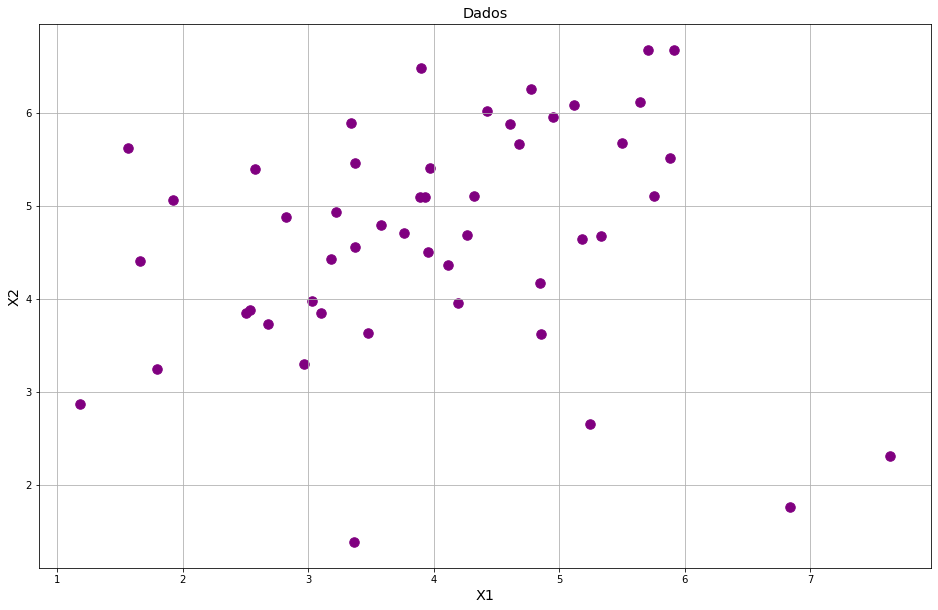

In [5]:
plt.figure(figsize=(16,10))

plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='purple', s=90) 

plt.title('Dados',fontsize='x-large')

plt.xlabel('X1',fontsize='x-large')

plt.ylabel('X2',fontsize='x-large')

plt.grid()

<span style='font-family:serif'>
    
## 2. Normalização



<span style='font-family:serif'>
Atributos com escalas diferentes podem gerar um $bias$ na análise. Assim, devem ser normalizados de forma que a média ($\mu$) seja igual a 0 e desvio padrão ($\sigma$) igual a 1.
    

<center>$X$Normalizado = ($X$ - $\mu$) / $\sigma$</center>


In [6]:
def normaliza(X):
    """
    Normaliza os atributos.
    
    Entrada: X não normalizado.
    Saída: X normalizado.
    
    """
    
    m, n = X.shape 
    
    X_norm = np.zeros( (m,n) ) 
    
    mu = 0 
    
    sigma = 1
    
    mu = X.mean(axis=0)
    
    sigma = X.std(axis=0,ddof=1)
    
    colu, lin = 0, 0
    
    for colu in range(X.shape[1]):
    
        for lin in range(X.shape[0]):
    
            X_norm[lin,colu]=(X[lin,colu]-mu[colu])/(sigma[colu])   
    
    
    return X_norm, mu, sigma

X_norm, mu, sigma = normaliza(X)

<span style='font-family:serif'>

## 3. Análise de Componentes Principais (PCA)


<span style='font-family:serif'>

Embora o entendimento da análise seja complexo, a sua implementação matemática é fácil. O primeiro passo para o PCA, é calcular a matriz covariância dos dados:

$$\psi = \frac{1}{m}X^{T}X$$

- $X$ é a matriz de dados;
- $X^{T}$ é a matriz transposta de X;
- $m$ é a quantidade de objetos; 
- $\psi$ é a matriz quadrada ($n \times n$) resultante.
    
Uma vez encontrada a matriz de covariância dos dados, é necessário realizar sua decomposição em valores singulares (SVD). Para realizar a fatoração, será utilizada a função np.linalg.svd. Esta função decompõe a matriz de covariância em um produto escalar de três matrizes, sendo que uma delas contém todos os componentes principais necessários.



In [7]:
def pca(X):
    """
    
    Executa a analise de componentes principais na matriz de dados X.

    Entrada: Dados X.
    Saída: Autovetores (U) e Autovalores (S).
    
    """

    m, n = X.shape 
    U = np.zeros( [n,n] ) 
    S = np.zeros( n )  
    
    # Calcula a matriz de covariância
    
    psi=np.zeros([n,n])
    psi=(1/m)*np.dot(X.T,X)
    
    # Realiza a decomposição SVD (Single Values Decomposition)
    
    U, S, V = np.linalg.svd(psi)
    

    return U, S 
    
    

U, S = pca(X_norm)

<span style='font-family:serif'>
    
As setas indicam as componentes principais, ou seja, direções de máxima variação dos dados. Como os dados possuiam apenas dois atributos, há apenas duas componentes. A componente vermelha é a que apresenta maior significância:

Text(0, 0.5, 'X2')

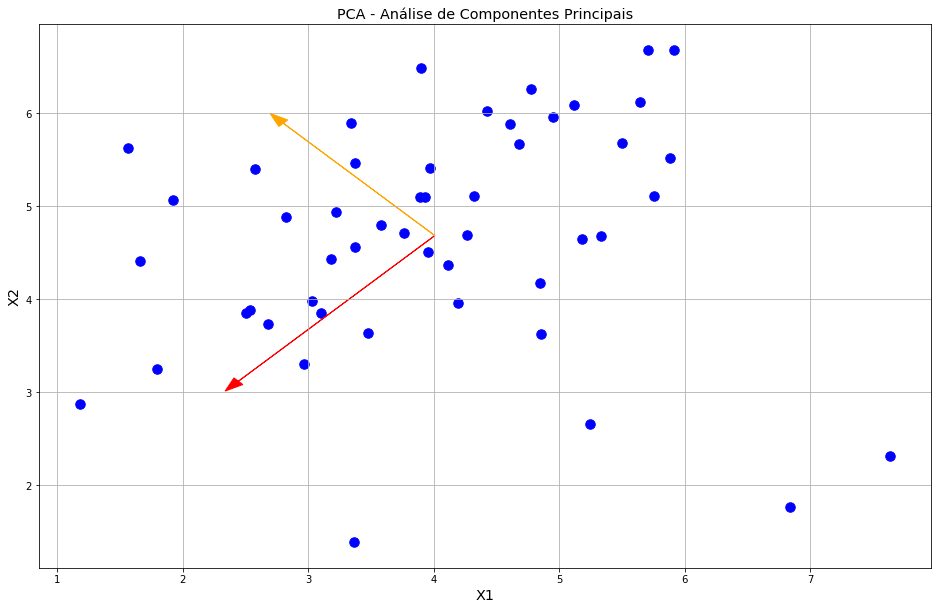

In [25]:
plt.figure(figsize=(16,10))

plt.scatter( X[:,0], X[:,1], marker='o', label = 'Dados', color='blue', s=90) 

plt.arrow( x=mu[0], y=mu[1], dx=2 * S[0] * U[0, 0], dy=2 * S[0] * U[1, 0], head_width=0.10, color='red')

plt.arrow( x=mu[0], y=mu[1], dx=2 * S[1] * U[0, 1], dy=2 * S[1] * U[1, 1], head_width=0.10, color='orange') 

plt.grid()

plt.title('PCA - Análise de Componentes Principais',fontsize='x-large')

plt.xlabel('X1',fontsize='x-large')

plt.ylabel('X2',fontsize='x-large')


<span style='font-family:serif'>
    
Ao realizar a Análise de Componentes Principais, deve-se atentar para a quantidade de variância explicada necessária, uma vez que a técnica nada mais é do que a **preservação dos eixos que descrevem a maior quantidade de variância dos dados**, garantindo a perda de pouca informação. Assim, pode-se calcular quantas componentes você deve utilizar para atender a demanda de variância previamente dimensionada. A variância explicada por cada componente pode ser calculada por:
    
$$V_{Exp} = \frac{S}{\sum_{i=1}^{n} (S_i)}$$ 
    
Onde:

- $V_{Exp}$ : Vetor de Variância Explicada Para Cada Componente;
    
- $S$ : Vetor de Auto-Valores;

In [29]:
def var_expl(S):
    
    """
    
    Calcula a variância explicada de cada componente.

    Entrada: Vetor de Autovalores (S).
    Saída: Vetor de Variância Explicada (var).
    
    """

    var = S/(np.sum(S))
    
    return var

var=var_expl(S)

print('Porcentagem de variância explicada pela primeira componente: %1.2f%%' %(var[0]*100))
print('Porcentagem de variância explicada pela segunda componente: %1.2f%%' %(var[1]*100))

Porcentagem de variância explicada pela primeira componente: 56.45%
Porcentagem de variância explicada pela segunda componente: 43.55%


<span style='font-family:serif'>

A primeira componente é a que explica a maior parte da variância, com 56.45%.

<span style='font-family:serif'>

Uma vez identificada a quantidade de componentes necessárias para atingir o objetivo pré-estabelecido de variância, os dados são então projetados nesta. No tutorial, iremos projetá-los sobre a componente vermelha, de variância de 56.45%, diminuindo o espaço dimensional de 2 para 1 dimensão.
    
A projeção é dada pelo simples produto escalar:
    
$$X_{Projetado} = X \cdot W_{d}$$ 
    
Onde:

- $X_{Projetado}$ : Dados Projetados nas $N$ Componentes Escolhidas;

    
- $X$ : Conjunto de Dados;

    
- $W_{d}$ : Matriz de Auto-Vetores nas $N$ Componentes Escolhidas;
    
    
    
    
Uma vez projetados os dados, é possível recuperá-los nas dimensões originais. Para isso, utiliza-se a seguinte equação:
    
$$X_{Recuperado} = X_{Projetado} \cdot W^{T}$$ 
    
Onde:

- $X_{Projetado}$ : Dados Projetados nas $N$ Componentes Escolhidas;

    
- $X_{Recuperado}$ : Dados recuperados para a Dimensão Original com Perdas;

    
- $W^{T}$ : Matriz de Auto-Vetores nas $N$ Componentes Escolhidas Transposta;
 
    

In [48]:
def projecao(X, U, N): 
    
    """
    
    Projeta os dados X, nas N componentes principais.
    
    Entrada: Dados (X), Auto-Vetores (U), Número de Componentes (N).
    Saída: Dados Projetados (Z).
    
    """
    
    Z = np.zeros( [X.shape[0],N] )   
    
    Z = np.dot(X,U[:,0:N])
    
    return Z

N = 1
Z = projecao(X_norm, U, N)

print('Cinco Primeiros Dados Projetados: ')

print(Z[:5])

Cinco Primeiros Dados Projetados: 
[[ 2.23379119]
 [ 1.24841604]
 [ 1.35905894]
 [ 0.10600508]
 [-0.13399883]]


In [49]:
def recuperacao(Z, U, N): 
    
    """
    
    Recupera os dados X com perdas, nas componentes originais.
    
    Entrada: Dados Projetados (Z), Auto-Vetores (U), Número de Componentes (N).
    Saída: Dados Projetados (K).
    
    """
    
    K = np.zeros( [Z.shape[0], U.shape[0]] ) 
    
    K = np.dot(Z,U[:,0:N].T)

    return K

N = 1
K = recuperacao(Z, U, N) 

Text(0, 0.5, 'X2')

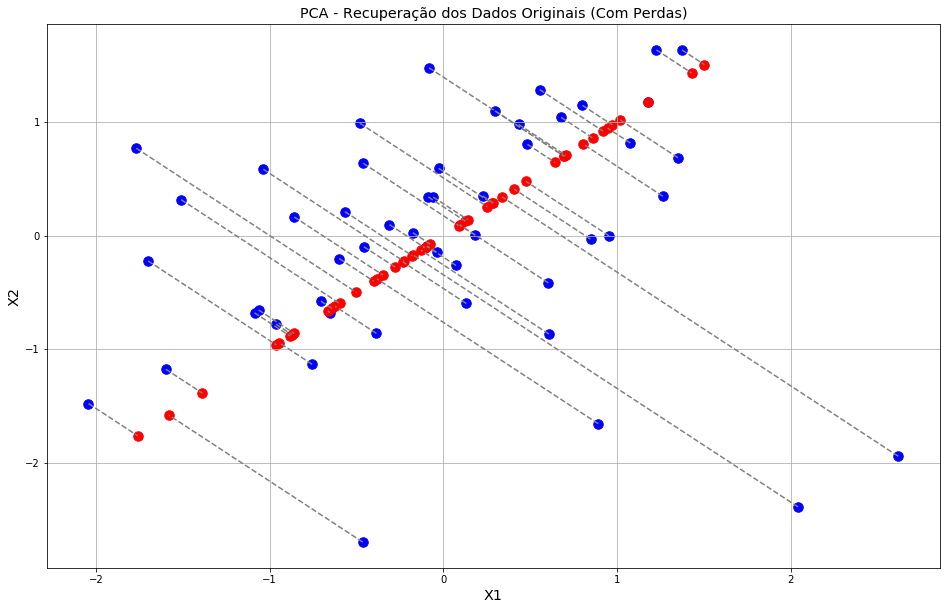

In [50]:
plt.figure(figsize=(16,10))

plt.scatter( X_norm[:,0], X_norm[:,1], marker='o', color='blue', s=90) 

plt.scatter( K[:,0], K[:,1], marker='o', color='red', s=90)


for i in range( X_norm.shape[0] ):
    plt.plot( [X_norm[i,0],K[i,0]], [X_norm[i,1],K[i,1]], linestyle='--', color='gray') 
    

plt.grid()

plt.title('PCA - Recuperação dos Dados Originais (Com Perdas)',fontsize='x-large')

plt.xlabel('X1',fontsize='x-large')

plt.ylabel('X2',fontsize='x-large')


<span style='font-family:serif'>
    
O gráfico acima representa a recuperação dos dados originais, com perdas. As bolinhas de cor azul representam os dados originais, do início do tutorial. As vermelhas, os dados que foram projetados e em seguida recuperados. Nota-se que a projeção ocorreu apenas no eixo vermelho (de maior variância), excluindo-se a componente laranja. Ao recuperá-los, a variância da componente laranja não foi levada em consideração, o que gerou as perdas na descrição do comportamento dos dados. A distância entre cada dado original e sua versão recuperada é demarcada pela linha tracejada cinza.